# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import get_dataset
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

In [3]:
tfrecords = glob.glob('data/processed/*.tfrecord')
dataset = get_dataset(tfrecords[0])

INFO:tensorflow:Reading unweighted datasets: ['data/processed/segment-11252086830380107152_1540_000_1560_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/processed/segment-11252086830380107152_1540_000_1560_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
def display_instances(batch, save_dir=None):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    import object_detection.utils.visualization_utils as vis_util
    image, boxes, classes = batch['image'], batch['groundtruth_boxes'], batch['groundtruth_classes']
    output = image.squeeze().copy()
    category_index = {1:{'id':1, 'name':'vehicle'}, 2:{'id':2, 'name':'pedestrian'}, 4:{'id':4, 'name':'cyclist'}}
    output = vis_util.visualize_boxes_and_labels_on_image_array(
        output, boxes, classes, np.ones_like(classes), category_index, 
        line_thickness=1,
        max_boxes_to_draw=None,
        use_normalized_coordinates=True, 
        min_score_thresh=0.5,
        groundtruth_box_visualization_color=(255,0,0),
        skip_scores=True,
        skip_labels=True,
    )
    if save_dir is None:
        plt.figure(figsize=(10, 10))
        plt.imshow(output)
        plt.show()
    else:
        mpimg.imsave(f'{save_dir}/{batch["filename"].decode("utf-8")}.jpg', output)

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

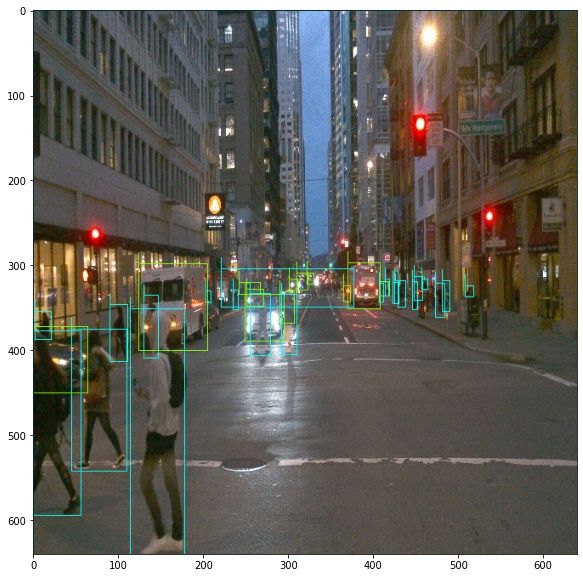

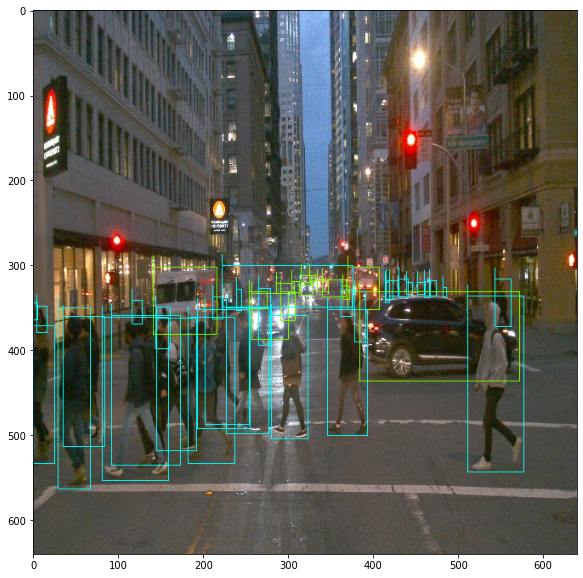

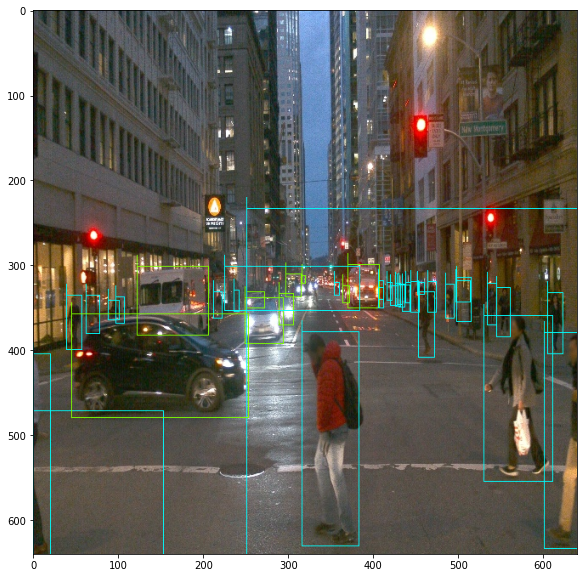

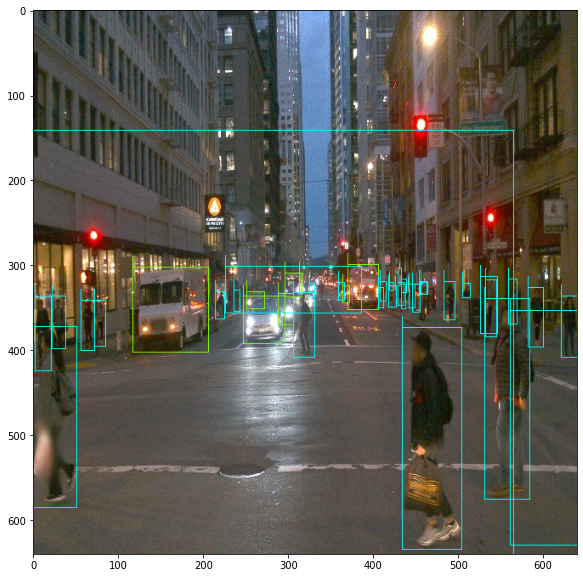

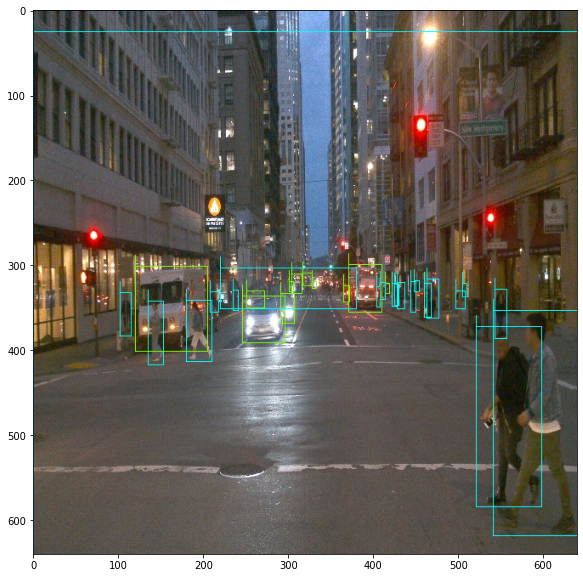

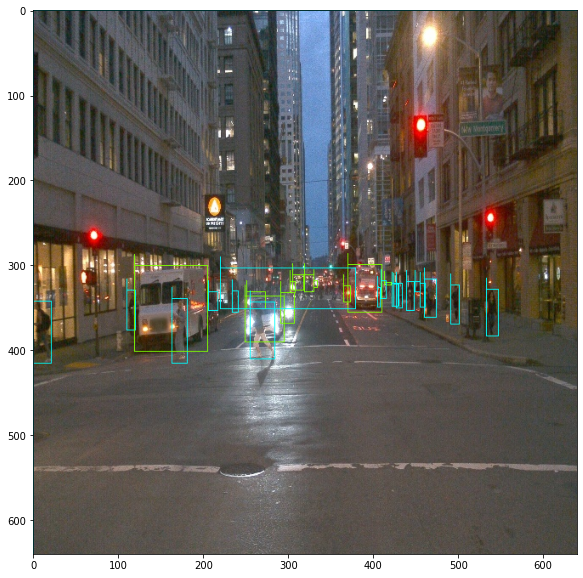

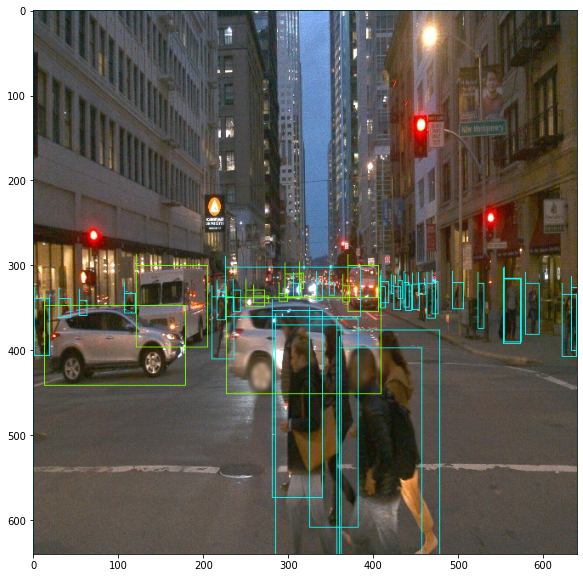

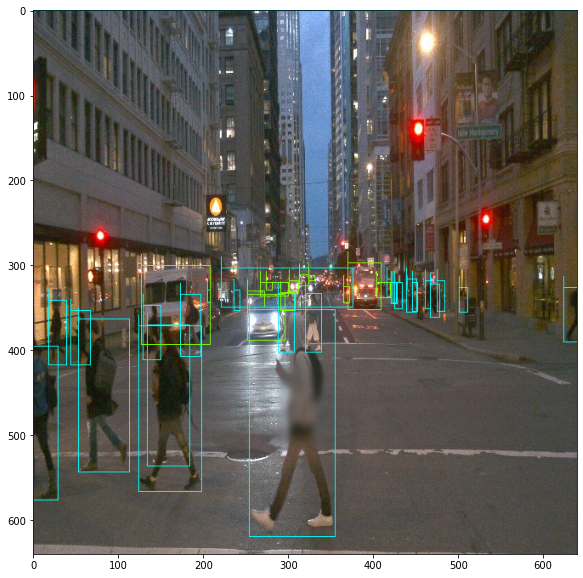

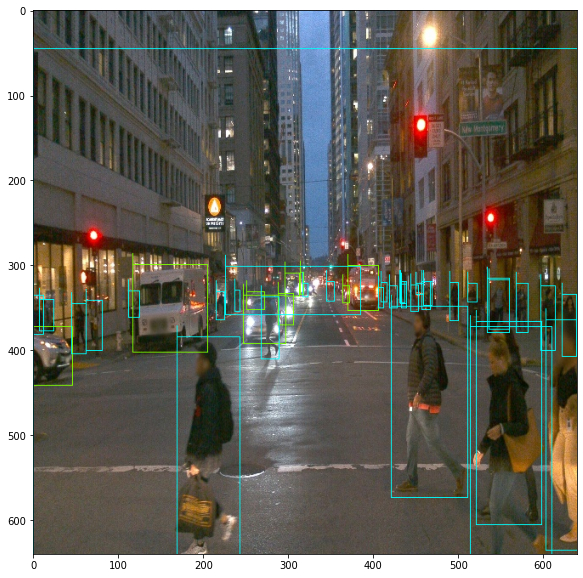

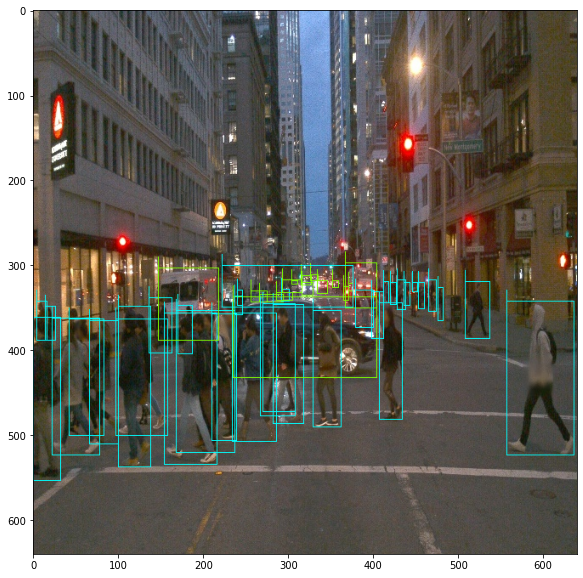

In [5]:
for i in range(10):
    sample = list(dataset.shuffle(1000).take(1).as_numpy_iterator())[0]
    display_instances(sample)

### From the above images, we have the following observations:
- The car is driving in a busy city street at late afternoon,  waiting on a red traffic light at an intersection.
- Many people are crossing the street in the foreground. Cars are crossing the street too.
- Across the intersection, cars in the opposite direction are waiting on the traffic light.
- People are walking on the sidewalks. A truck is parked at the curb.
- The overall lighting is sort of dark, but objects are fairly distinguishable.
- The images contain a big density of objects. Occlusion is common place.
- Objects, being at difference distances from the car, have a diversity of sizes.

## Additional EDA

### Generate sample images for the whole dataset

In [6]:
for rec in tfrecords:
    dataset = get_dataset(rec)
    sample = list(dataset.shuffle(1000).take(1).as_numpy_iterator())[0]
    display_instances(sample, save_dir='images')

### Typical scenes from the dataset

#### Curved street and shadow
<img src="images/segment-1051897962568538022_238_170_258_170_with_camera_labels_21.tfrecord.jpg" width="300">

#### Uphill and fog
<img src="images/segment-1083056852838271990_4080_000_4100_000_with_camera_labels_98.tfrecord.jpg" width="300">

#### Backlighting
<img src="images/segment-10072140764565668044_4060_000_4080_000_with_camera_labels_85.tfrecord.jpg" width="300">

#### Traffic jam
<img src="images/segment-10094743350625019937_3420_000_3440_000_with_camera_labels_105.tfrecord.jpg" width="300">

#### Highway bridge
<img src="images/segment-10153695247769592104_787_000_807_000_with_camera_labels_40.tfrecord.jpg" width="300">

#### No painted lane
<img src="images/segment-10327752107000040525_1120_000_1140_000_with_camera_labels_131.tfrecord.jpg" width="300">

#### One way
<img src="images/segment-10498013744573185290_1240_000_1260_000_with_camera_labels_26.tfrecord.jpg" width="300">

#### Road work
<img src="images/segment-10500357041547037089_1474_800_1494_800_with_camera_labels_150.tfrecord.jpg" width="300">

#### Behind a truck
<img src="images/segment-10599748131695282446_1380_000_1400_000_with_camera_labels_23.tfrecord.jpg" width="300">

#### Hill and trees
<img src="images/segment-10734565072045778791_440_000_460_000_with_camera_labels_167.tfrecord.jpg" width="300">

#### Night
<img src="images/segment-10082223140073588526_6140_000_6160_000_with_camera_labels_9.tfrecord.jpg" width="300">

#### Highway
<img src="images/segment-10923963890428322967_1445_000_1465_000_with_camera_labels_193.tfrecord.jpg" width="300">

#### Rain at night
<img src="images/segment-10975280749486260148_940_000_960_000_with_camera_labels_168.tfrecord.jpg" width="300">

#### Sharp turn
<img src="images/segment-11004685739714500220_2300_000_2320_000_with_camera_labels_24.tfrecord.jpg" width="300">

#### Big city
<img src="images/segment-11070802577416161387_740_000_760_000_with_camera_labels_117.tfrecord.jpg" width="300">

#### Small town
<img src="images/segment-11113047206980595400_2560_000_2580_000_with_camera_labels_178.tfrecord.jpg" width="300">

#### Under the bridge
<img src="images/segment-11318901554551149504_520_000_540_000_with_camera_labels_169.tfrecord.jpg" width="300">

#### Parking lot
<img src="images/segment-11489533038039664633_4820_000_4840_000_with_camera_labels_91.tfrecord.jpg" width="300">

#### T-intersection
<img src="images/segment-11623618970700582562_2840_367_2860_367_with_camera_labels_73.tfrecord.jpg" width="300">

### Image distributions

Here we look at the brightness and color distribution of the sample images.

In [7]:
import cv2

def histogram(fn, range=(0, 255)):
    images = glob.glob('images/*.jpg')
    images = [mpimg.imread(x) for x in images]
    images = [cv2.cvtColor(x, cv2.COLOR_RGB2BGR) for x in images]
    output = [fn(x) for x in images]
    plt.hist(output, range=range, bins=20)

def bright(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[..., 2].mean()

def blue(img):
    return img[...,0].mean()

def green(img):
    return img[...,1].mean()

def red(img):
    return img[...,2].mean()

def dynamicrange(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return np.log10(gray.max() / (gray.min() + 1)) * 20

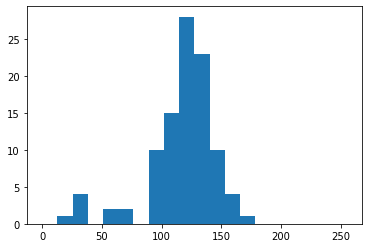

In [8]:
histogram(bright)

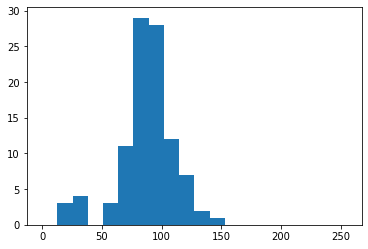

In [9]:
histogram(red)

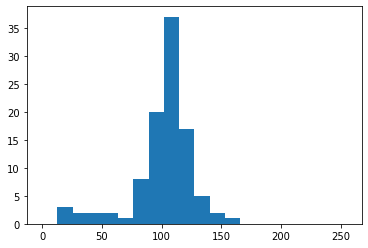

In [10]:
histogram(green)

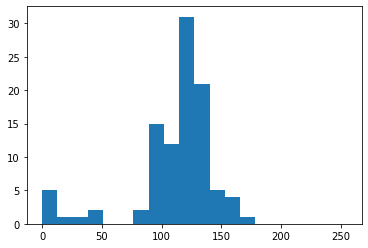

In [11]:
histogram(blue)

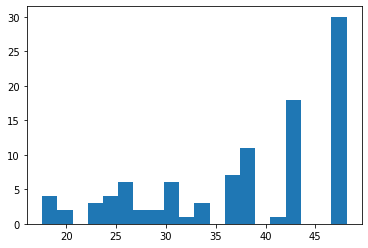

In [12]:
histogram(dynamicrange, range=None)